In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# chemin pour accéder aux différents fichiers
cwd = os.getcwd()
data_dir = os.path.join(os.path.dirname(cwd), 'data')
shp_dir = os.path.join(os.path.dirname(os.path.dirname(cwd)), 'Shapefile')

In [12]:
# lecture du fichier 
flandre = gpd.read_file(os.path.join(shp_dir, 'flandre/Landbouwgebruikspercelen_LV_2020_GewVLA_Shapefile/Shapefile/Lbgbrprc20.shp'))

# conversion des m² en hectares
flandre['OPPERVL'] /= 1000

flandre = flandre.sort_values(by = ['OPPERVL'])

flandre

,OIDN,UIDN,ALVID,HFDTLT,LBLHFDTLT,GEWASGROEP,PM,LBLPM,LENGTE,OPPERVL,geometry
496589,1641196,4314395,2075655813,9715,Druiven,Fruit en Noten,BGG,Blijvend grasland gescheurd,1.24,0.00006,"POLYGON ((213721.010 165052.080, 213720.792 16..."
478337,1622944,4296143,2074405927,60,Grasland,Grasland,None,None,11.57,0.00071,"POLYGON ((156654.919 186710.650, 156652.290 18..."
474934,1619541,4292740,2076325012,9828,Natuurlijk grasland met minimumactiviteit,Grasland,None,None,22.40,0.00124,"POLYGON ((152224.010 178953.420, 152223.600 17..."
504169,1648776,4321975,2075655712,9726,"Meerjarige fruitteelten (zoete kers, hoogstam)",Fruit en Noten,BGG,Blijvend grasland gescheurd,26.10,0.00259,"POLYGON ((213720.792 165051.842, 213712.120 16..."
447932,1256985,4265738,1533518567,60,Grasland,Grasland,None,None,70.38,0.00550,"MULTIPOLYGON (((112580.800 187907.000, 112571...."
...,...,...,...,...,...,...,...,...,...,...,...
20612,1235127,2524797,1430032301,6,Begraasde niet-landbouwgrond,Overige gewassen,None,None,4091.33,944.16381,"POLYGON ((228324.050 193368.460, 227344.710 19..."
479493,1624100,4297299,2077964009,9825,Heide in natuurbeheer,Houtachtige gewassen,None,None,6524.57,945.00626,"POLYGON ((154139.363 231612.373, 154143.897 23..."
20614,1235131,2524801,1430033614,6,Begraasde niet-landbouwgrond,Overige gewassen,None,None,4834.86,947.51379,"POLYGON ((228775.210 193624.820, 229075.280 19..."
22274,1262695,2552365,1534379039,9825,Heide in natuurbeheer,Houtachtige gewassen,None,None,4230.12,985.94770,"POLYGON ((218174.500 199324.510, 218033.090 19..."


In [3]:
# nombre total de parcelles
nb_parcelles = flandre.index
nb_parcelles

RangeIndex(start=0, stop=525592, step=1)

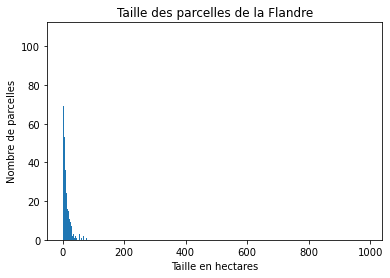

In [13]:
# histogramme des tailles de parcelles
data = flandre['OPPERVL']
plt.hist(data, bins = 525592)
plt.xlabel('Taille en hectares')
plt.ylabel('Nombre de parcelles')
plt.title('Taille des parcelles de la Flandre')
plt.show()

In [5]:
# top 15 cultures
top_crop = flandre['LBLHFDTLT'].value_counts()
top_crop = top_crop.head(15)
top_crop

Grasland                                           202303
Silomaïs                                            85907
Korrelmaïs                                          34452
Wintertarwe                                         28985
Hoofdgebouwen                                       28711
Aardappelen (geplande oogst vanaf 1/9)              21158
Grasklaver                                          11470
Wintergerst                                          8743
Suikerbieten                                         7437
Meerjarige fruitteelten (peer)                       7400
Andere stallen en gebouwen                           7085
Niet nader omschreven gewas - kleine landbouwer      5841
Aardappelen (geplande oogst voor 1/9)                4238
Voederbieten                                         3475
Natuurlijk grasland met minimumactiviteit            3470
Name: LBLHFDTLT, dtype: int64